In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 


# TODO: remove '..' if run from root folder
home = os.path.abspath(os.path.join(os.getcwd(),'..', '..', '..'))
pths = [os.path.join(home, 'astrobot')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

import astrobot 
from astrobot.util import *

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 
import pandas as pd 

# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')
# To read clipboard
# pd.read_clipboard()

In [2]:
from astrobot.energy_survey import EnergySurvey as es
from astrobot.viz4 import Viz4

In [3]:
dd = es.com_survey_df()
kk = es.com_key_df()

In [4]:
#print(list(kk['varname'].values))
#kk['varname']#['CENDIV']


In [40]:
import warnings
warnings.filterwarnings('ignore')

# Office
d,k = dd,kk

# Filter
d = d.query('vacant != 1 and monuse > 10') # Get rid of bad data
d = d.query('500000 > sqft > 100000')       # For larger samples
d = d.query('cendiv == "1"')               # New England
#d = d.query('yrcon > 2000')
do = d.query('pba == "14"')                 # Office

print('sample: ', do.shape[0], 'rep: ', do.finalwt.sum())

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

do = es.loads(do)
#dol = do.sort_values('eui', ascending=False)[es.ldlst()]

sample:  11 rep:  1426.9833738420002


In [41]:
_do = do 


In [42]:
do.index = range(do.shape[0])
#fig, ax = plt.subplots(1, 1, figsize=(10,5))
#_do = do.sort_values('eui', ascending=False)[es.ldlst()]
#Viz4.stacked_eui_plot(_do, 500, showlegend=True, ax=ax)


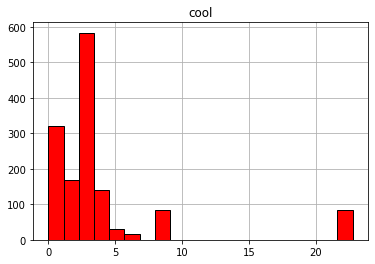

In [44]:
load = 'cool'
dol = do.sort_values(load, ascending=True)[[load, 'finalwt']]

# # rate = 1 / mu = sqrt(1 / sigma^2)
# # mu = 1 / rate
# # sigma^2 = 1 / rate^2

# exp_fx = lambda r, x: r * np.exp(-r * x)
# rate1 = 1 / dol.values.mean()
# rate2 = np.sqrt(1 / (dol.values.std() ** 2))
# rate = (rate1 + rate2) / 2.0


heathist = []

for ht, wt in zip(dol[load].values, dol.finalwt.values): 
    #if ht < 8.0: continue
    hts = np.ones(int(wt)) * ht
    heathist.extend(list(hts))

heathist = np.array(heathist)
wtdf = pd.DataFrame({load: heathist})



f, a = plt.subplots()
_ = wtdf.hist(bins=20, rwidth=1, facecolor='red', edgecolor='black', ax=a)

# X = np.arange(100)
# a.plot(X, exp_fx(rate, X) * 30.0 * (1/0.04), 'blue')

a.set_axisbelow(True)

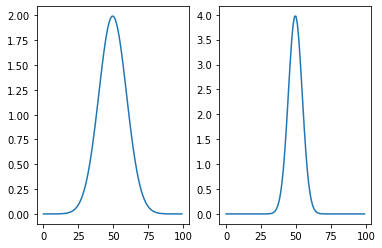

In [105]:
def gaussian(x, mu=0, sig=1):
    top = -0.5 * ((x - mu) / sig) ** 2
    return np.exp(top) / (np.sqrt(2 * np.pi * sig))

mu1, std1 = 0.35, 0.2
mu2, std2 = 0.00056, 0.1

X1 = np.linspace(mu1 - std1, mu1 + std1, 100)
X2 = np.linspace(mu2 - std2, mu2 + std2, 100)
uval = gaussian(X1, mu1, std1 ** 2)
infl = gaussian(X2, mu2, std2 ** 2)

f, a = plt.subplots(1, 2)

_ = a[0].plot(uval)
_ = a[1].plot(infl)

